# Building a PubMed Dataset #

Step-by-Step Instructions for Constructing a Dataset of PubMed-Listed Publications on Cardiovascular Disease Research



## The Challenge ##

When I began working on my Master’s Thesis titled "Factors Associated with Impactful Scientific Publications in NIH-Funded Heart Disease Research," the first task was to build an original dataset to study. To achieve this, I turned to PubMed, a free research database provided by the National Library of Medicine (NLM) for accessing biomedical literature. 
The dataset needed to meet several specific criteria, including:

1. Spanning the longest possible time period.
2. Including research funded by the National Institutes of Health (NIH).
3. Focusing exclusively on Cardiovascular Disease Research publications.
4. Providing details about the first author, such as their full name, gender, institutional affiliation, and the country of the research institute.
5. Containing information on the number of citations each article received, NIH percentile ranking, total references in the article, and other citation-related data.
6. Including scientific ranking information for the journals.


In this article, I will explain how to create a dataset of PubMed-listed publications based on these criteria.

Two limiting factors, the availability of the first author’s full name and the years required for citations to occur, were used to choose the time period for data gathering. PubMed records started to include full author’s names, Full Author (FAU), for articles starting in 2002 [1]. In addition, three years is the minimum number of years recommended for citation and publication impact analysis [2]. To maximize the dataset size, a minimum time frame of two years for citations accumulation was applied, as the dataset was constructed in 2022. Furthermore, 2020 is the last year for which the Scientific Journal Ranking (SJR) information needed for data analysis was available at the time of dataset creation [3]. As a result, I searched PubMed for records from 2002 to 2020, creating a total of 18 datasets—one for each year. The overview of the limiting factors is shown in the flowchart below.

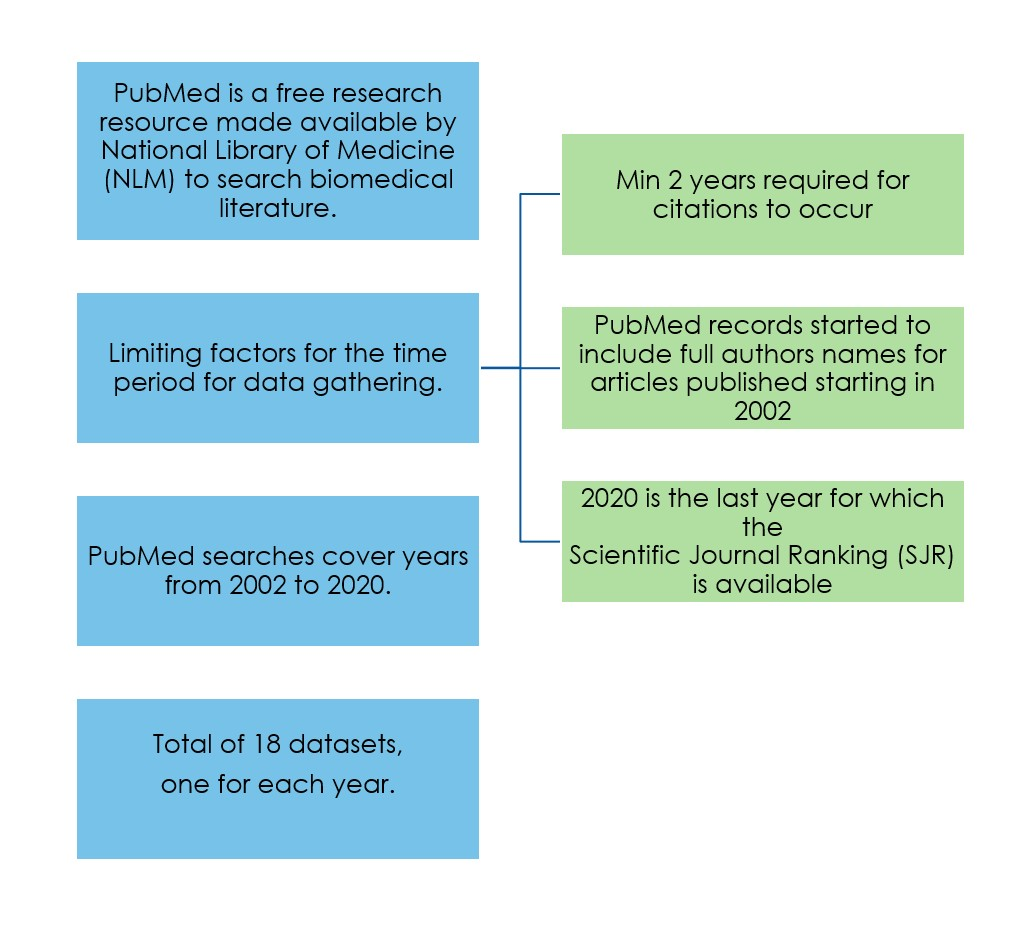

I used PubMed’s advanced search tool [4] to construct datasets of publications on cardiovascular disease. PubMed data element (field) descriptions [1] were used to make query calls. NIH funding is represented by National Heart, Lung, and Blood Institute (NHLBI) grant funding. I used the NHLBI grant ([GR]), the Date of Publication ([DP]) keywords in queries, along with the combination of keywords that are based on the cardiovascular disease-related conditions. Those keywords are cardiovascular, ischemic, and heart. 

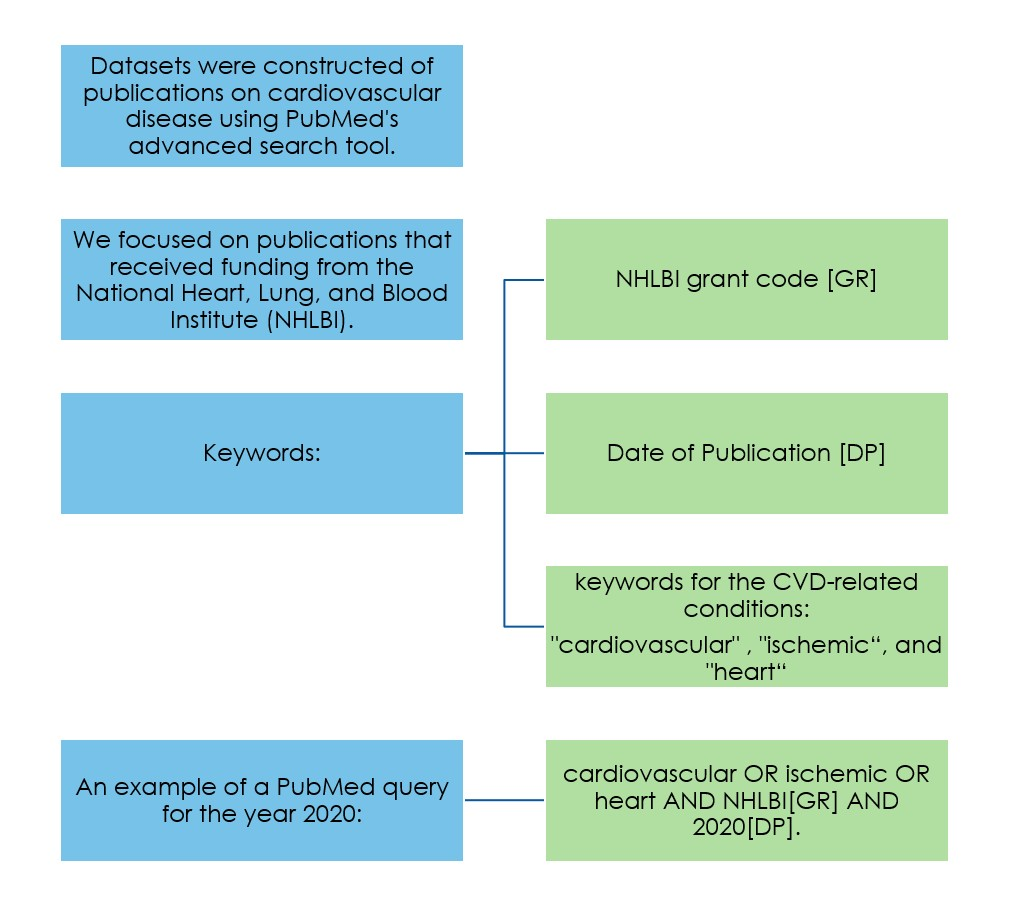

Example of PubMed query for the year 2020: “cardiovascular OR ischemic OR heart AND NHLBI[GR] AND 2020[DP]”.

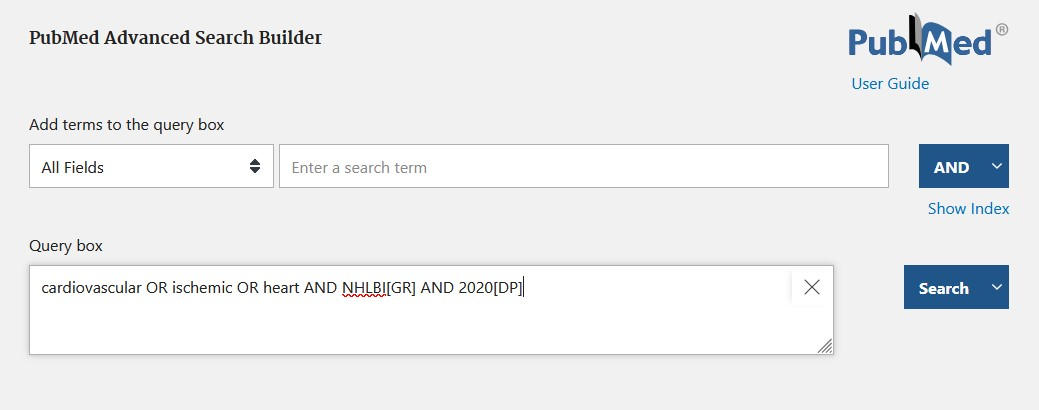

To get the journal name, article’s first author institution affiliation, and country for further parsing, I saved the advanced search PubMed queries by choosing the abstract format option in the display options menu and the PubMed format in the save citations to the file menu. 

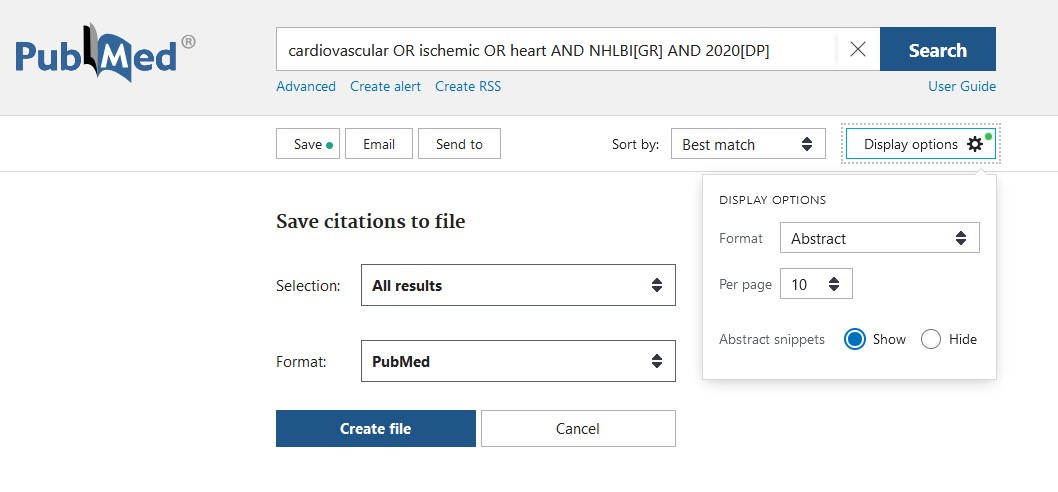

To acquire the list of PMIDs (PubMed Unique Identifier) for each publication needed for further citation information, I saved data collected via advanced search PubMed queries by choosing the abstract format option in the display options menu and the PMID format in the save citations to file menu.

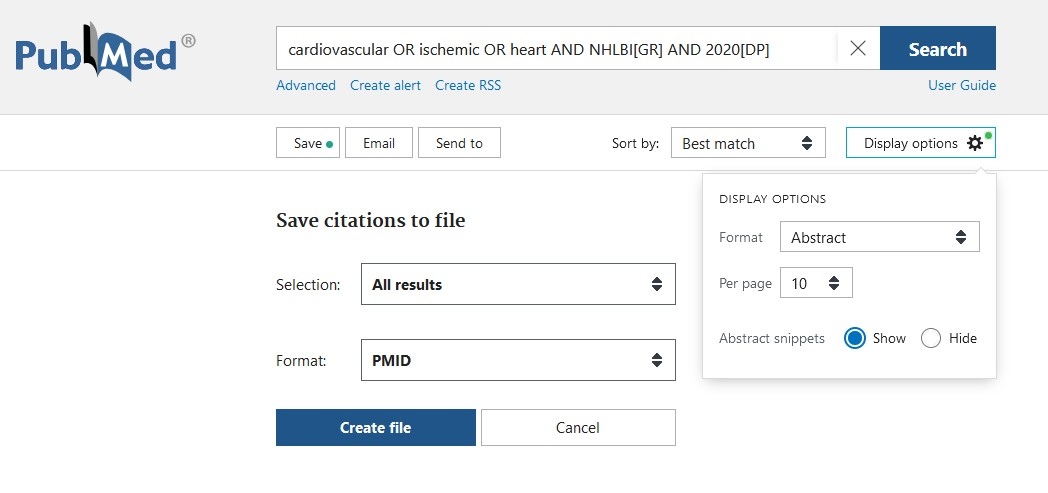

The flowchart below provides an overview of the steps taken after downloading the PubMed and PMID files from the PubMed website. A more detailed explanation follows.

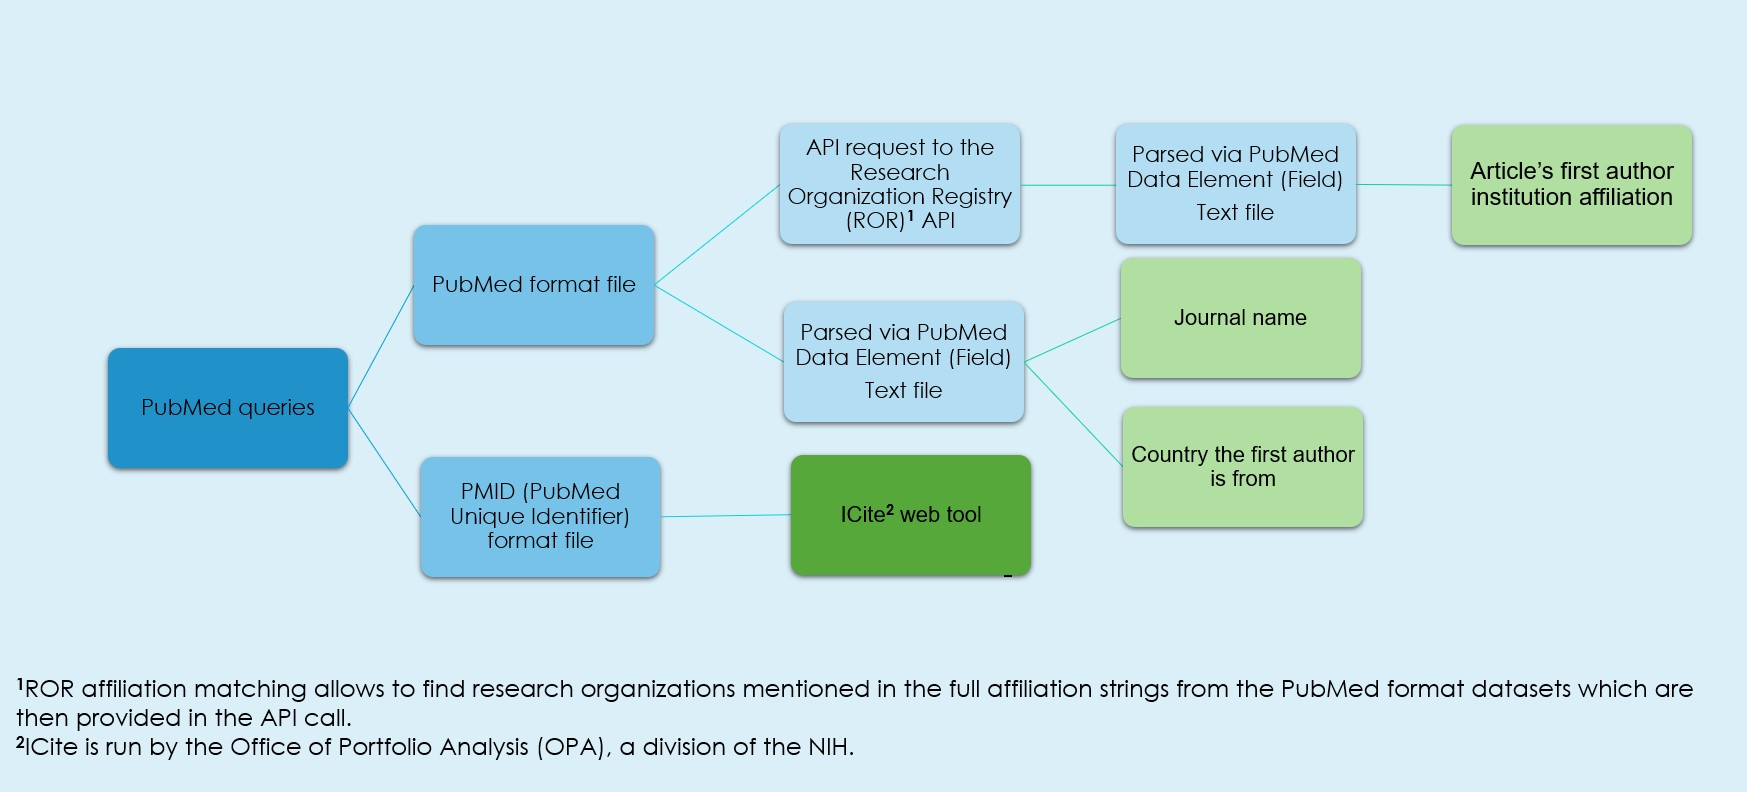

To acquire the citation-related information and full unabbreviated names of the authors when available, I uploaded the PMIDs dataset for each year to the ICite web tool [5]. I saved the resulting data analysis as csv files. ICite is run by the Office of Portfolio Analysis (OPA). The OPA is a division of the NIH that is responsible for the data-driven evaluation of research to help the NIH decide what current or new research areas will have a greater benefit for science and human health. ICite provides available information on the author’s full first name, total citations, citations per year, a field- and time-adjusted citation measure of scientific influence called Relative Citation Ratio (RCR), and NIH Percentile.

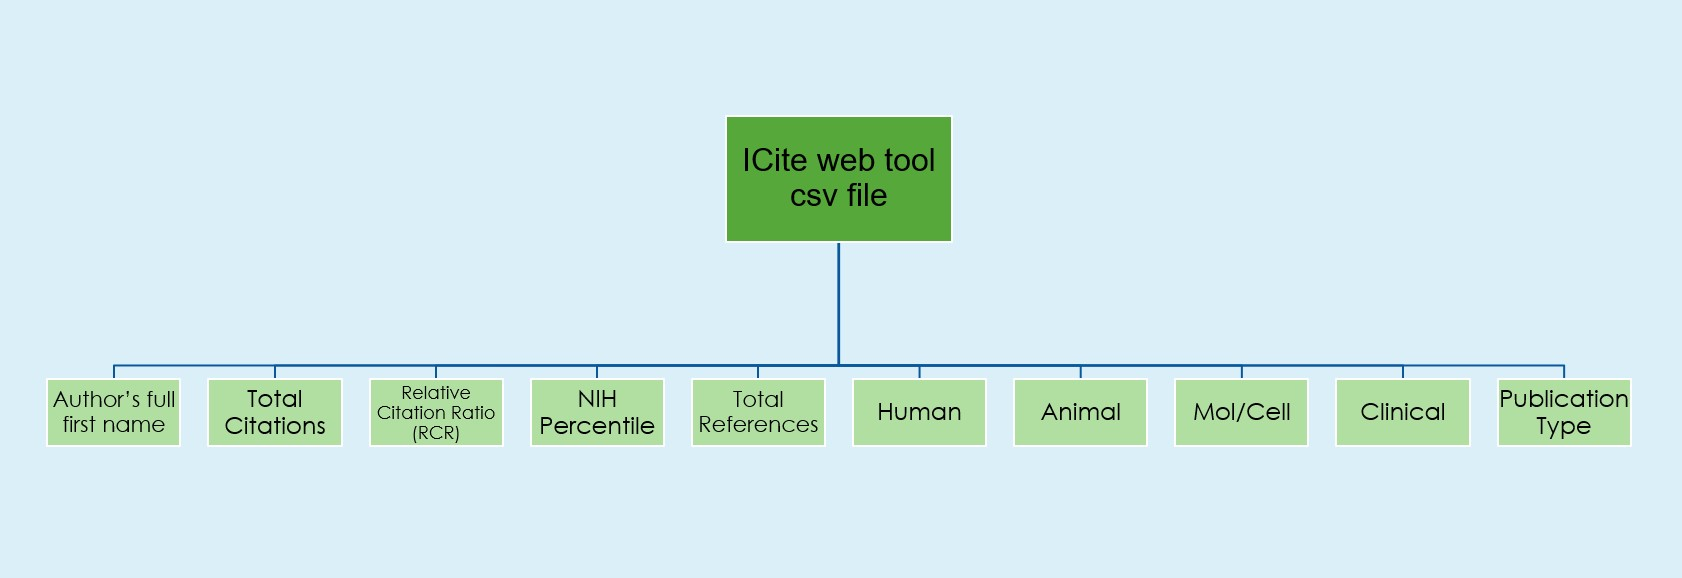

The PubMed format datasets cannot be saved in a CSV format and therefore had to be parsed to extract Journal Title (JT), first Author Institution Affiliation (AD), and country. I wrote a parsing script in Python 3.10.1 for these purposes. This article will not go into the details of the script, but I plan to cover them in a future publication. First author affiliation was determined by making an Application Programming Interface (API) request to the Research Organization Registry (ROR) API [5]. ROR matching was necessary because Data Element field provided inconsistent names for the research institutions along with unnecessary information such as address and department name. ROR affiliation matching allows to find research organizations mentioned in the full affiliation strings from the PubMed format datasets which are then provided in the API call. The results of the API call are returned in the JSON format. I parsed journal titles and countries from the PubMed format datasets using PubMed Data Element (Field) Descriptions included in this type of file format. I processed the dataset for each year separately. Bellow is the example of the PubMed format file entry. 

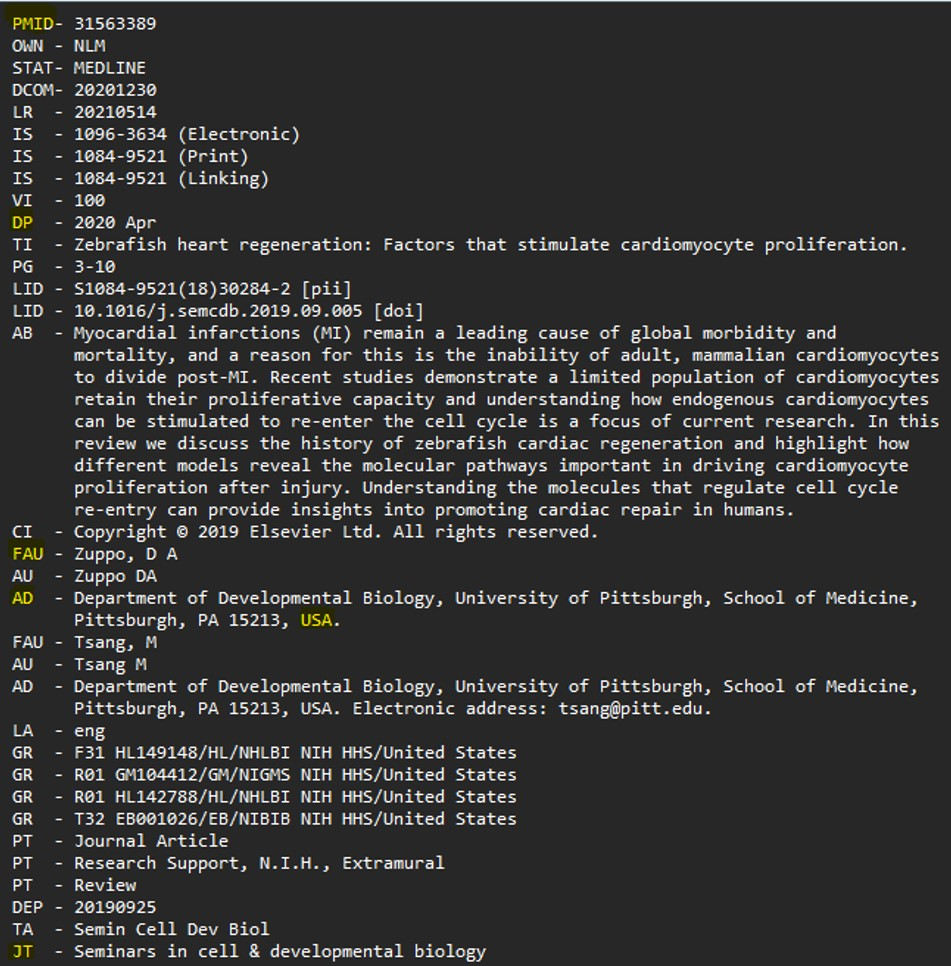

I processed the parsed PubMed format datasets for each year queried in a JupyterLab and merged them on PMIDs with ICite citation datasets. I merged the resulting datasets for each year based on journal names with the SJR dataset. I downloaded the SJR dataset for the last available year, 2020, from the SCImago Journal & Country Rank website [3]. The SCImago Journal & Country Rank database ranking used in this study is based on the SJR indicator. The SJR indicator was developed from the information contained in the Scopus® database and is a measure of a journal’s scientific impact. 

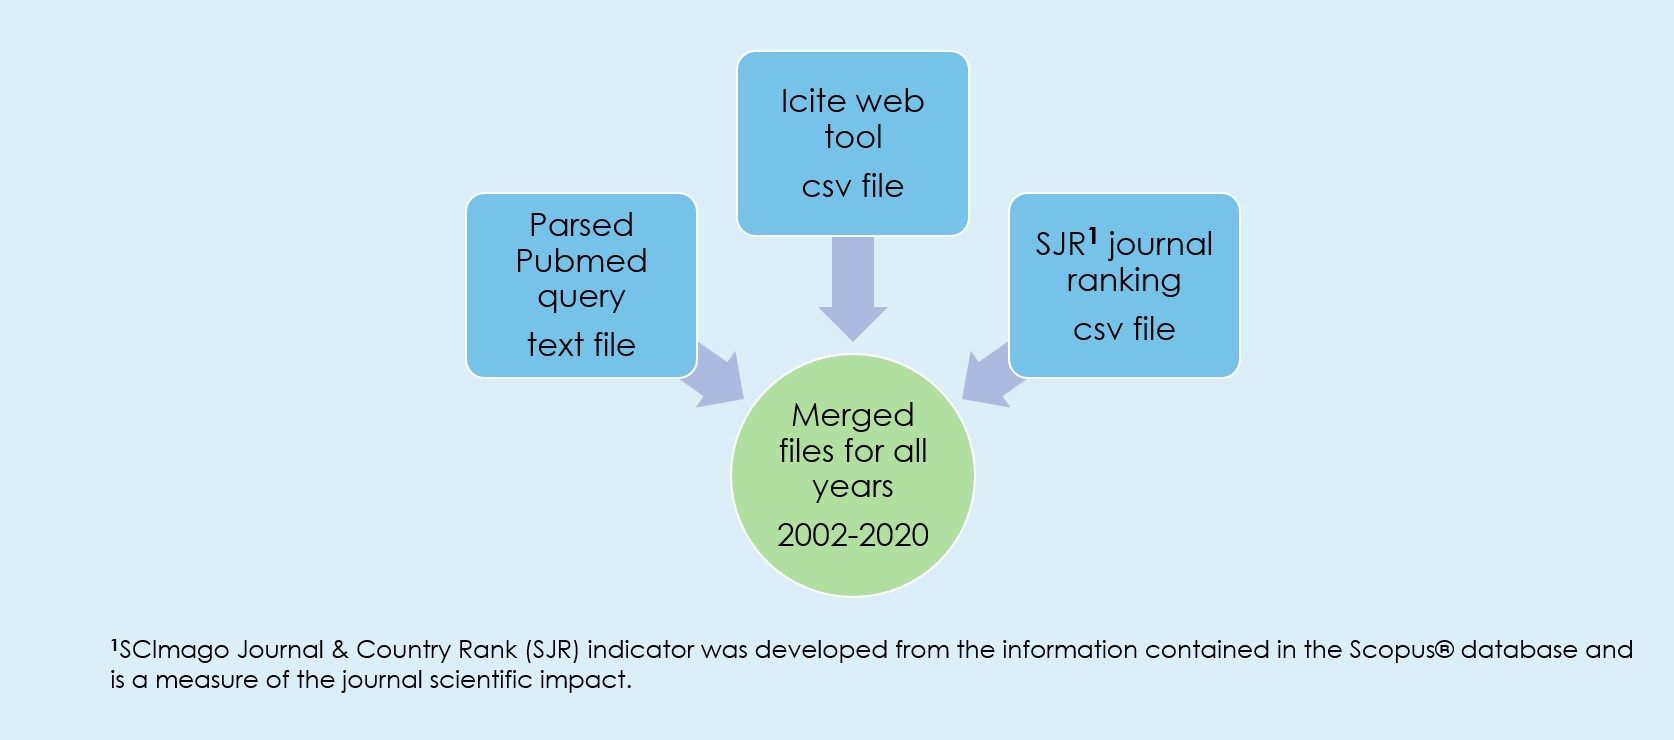

The subsequent steps included using the Gender-API web service to estimate the gender of first authors and performing data cleaning. These steps will not be covered in this publication.

In conclusion, learning how to build a dataset on your own is beneficial for several reasons:

1. Customization: You can tailor the dataset to fit your specific research needs.
2. Data Understanding: Building your own dataset helps you develop a deeper understanding of the data itself, including its limitations and biases.
3. Skill Development: It strengthens critical research skills such as data collection, cleaning, organization.
4. Control Over Quality: By constructing the dataset yourself, you have control over data quality.
5. Flexibility: You gain the ability to modify or expand the dataset as new questions arise.
6. Problem-Solving: The process fosters creative problem-solving as you develop methods for gathering, filtering, and structuring the data for analysis.

These benefits enhance your research capabilities and contribute to producing more impactful and precise results.

Jupyter Notebook used for this article can be found on [GitHub](https://github.com/drozenshteyn/Building-a-PubMed-Dataset)

The full MS Thesis referenced here can also be found on [GitHub](https://github.com/drozenshteyn/Master-s-Thesis)

Thank you for reading,

Diana

## References ##

1. U.S. National Library of Medicine , “MEDLINE/PubMed data element (field) descriptions,” nlm.nih.gov. Available: https://www.nlm.nih.gov/bsd/mms/medlineelements.html#fau
2. M. Thelwall, “Gender differences in citation impact for 27 fields and six English-speaking countries 1996–2014,” Quantitative Science Studies, vol. 1, no. 2, pp. 599–617, 06 2020.
3. SCImago, (n.d.), “SJR — SCImago Journal & Country Rank [Portal],” 2020, scimagojr.com. Available: http://www.scimagojr.com
4. U.S. National Library of Medicine, “Advanced search results - pubmed,”. Available: https://pubmed.ncbi.nlm.nih.gov/advanced/
5. Research Organization Registry, “ROR,” ror.org. Available: https://ror.org/